# Project Title: House price data analysis

## 1. Introduction (Notebook 1)
###  Project Overview
This notebook focuses on conducting a comprehensive exploratory data analysis (EDA) of the Melbourne Housing Snapshot dataset. The primary goal is to uncover hidden patterns, identify key features, and gain a deep understanding of the factors that influence property prices in Melbourne. This analysis will establish the foundation for subsequent machine learning model development in the second phase of the project.
### Dataset Description.
The dataset utilized in this analysis, the Melbourne Housing Snapshot, provides detailed information on residential properties sold in Melbourne, Australia. Features include square footage, number of bedrooms and bathrooms, year built, lot size, address, property type, and other pertinent characteristics. The target variable is the sale price of each house. This [dataset](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot), obtained from [Kaggle](https://www.kaggle.com/), offers a valuable resource for examining the impact of diverse property attributes on market value. It encompasses both numerical and categorical data types, enabling a comprehensive analysis.
#### Objective:
The goals of this notebook are:
+ To perform thorough data cleaning, addressing missing values and identifying potential outliers to ensure data quality and reliability for subsequent analysis and modeling.
+ To conduct exploratory data analysis (EDA) to uncover meaningful insights into the relationships between house features and their sale prices, identifying key drivers of property value.
+ To identify and engineer relevant features that significantly influence house prices, providing a solid foundation for building effective machine learning models in the next phase.
+ To prepare the dataset by cleaning, encoding, and formatting it appropriately for input into various regression algorithms in the subsequent notebook.

## 2. Setup and Data Loading


In [350]:
#Import Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [351]:
%cd ml_foundation/

[Errno 2] No such file or directory: 'ml_foundation/'
/Users/marcelgrossmann/Documents/Project/ml_foundation/ml_foundation


In [352]:
# Load Dataset:
path = 'dataset/melb_data.csv'
data = pd.read_csv(path)

# Display first five rows of the dataset:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 3. Data Exploration and Cleaning

In [353]:
# Data Summary:
data.info()
print('=========summary statistics===========')
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [354]:
range = data['Price'].max() - data['Price'].min()
print('Range:', range)

Range: 8915000.0


### Explanations:
* The 'data.info' reviews the following:
  + The data contains 13580 data entries(row) and 21 columns(features).
  + There is a mix of data types: integers (int64), floats (float64), and objects (objects).
  + The 'objects' data types likely represent categorical features, which will require encoding for machine learning models.
  + There following features 'BuildingArea', 'YearBuilt', 'CouncilArea' have missing values since their total number of non-null values are less than the total number of rows.
* The 'data.describe()' output provides summary statistics for the numerical columns:
  + The 'SalePrice' (target variable) has a wide range, indicating variability in house prices.
  + The 'LandSize' has a maximum value significantly higher than the 75th percentile, suggestiong potential outliers.
  + Some features like 'Distance', 'bedroom', 'bathroom' etc have minimum value of 0 which could indicate missing data or the absence of a feature.
  + Some the standard deviation of some features like 'LandSize', 'BuildingArea', 'Propatycount' have very high standard deviation indcating that a wide spread of the data around the mean.

### Handle Missing Values

In [355]:
data.isnull().sum() # sum of missing values per column

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [356]:
data.isnull().mean() # average missing values per columns

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

### Visualized missing values patterns

<Axes: >

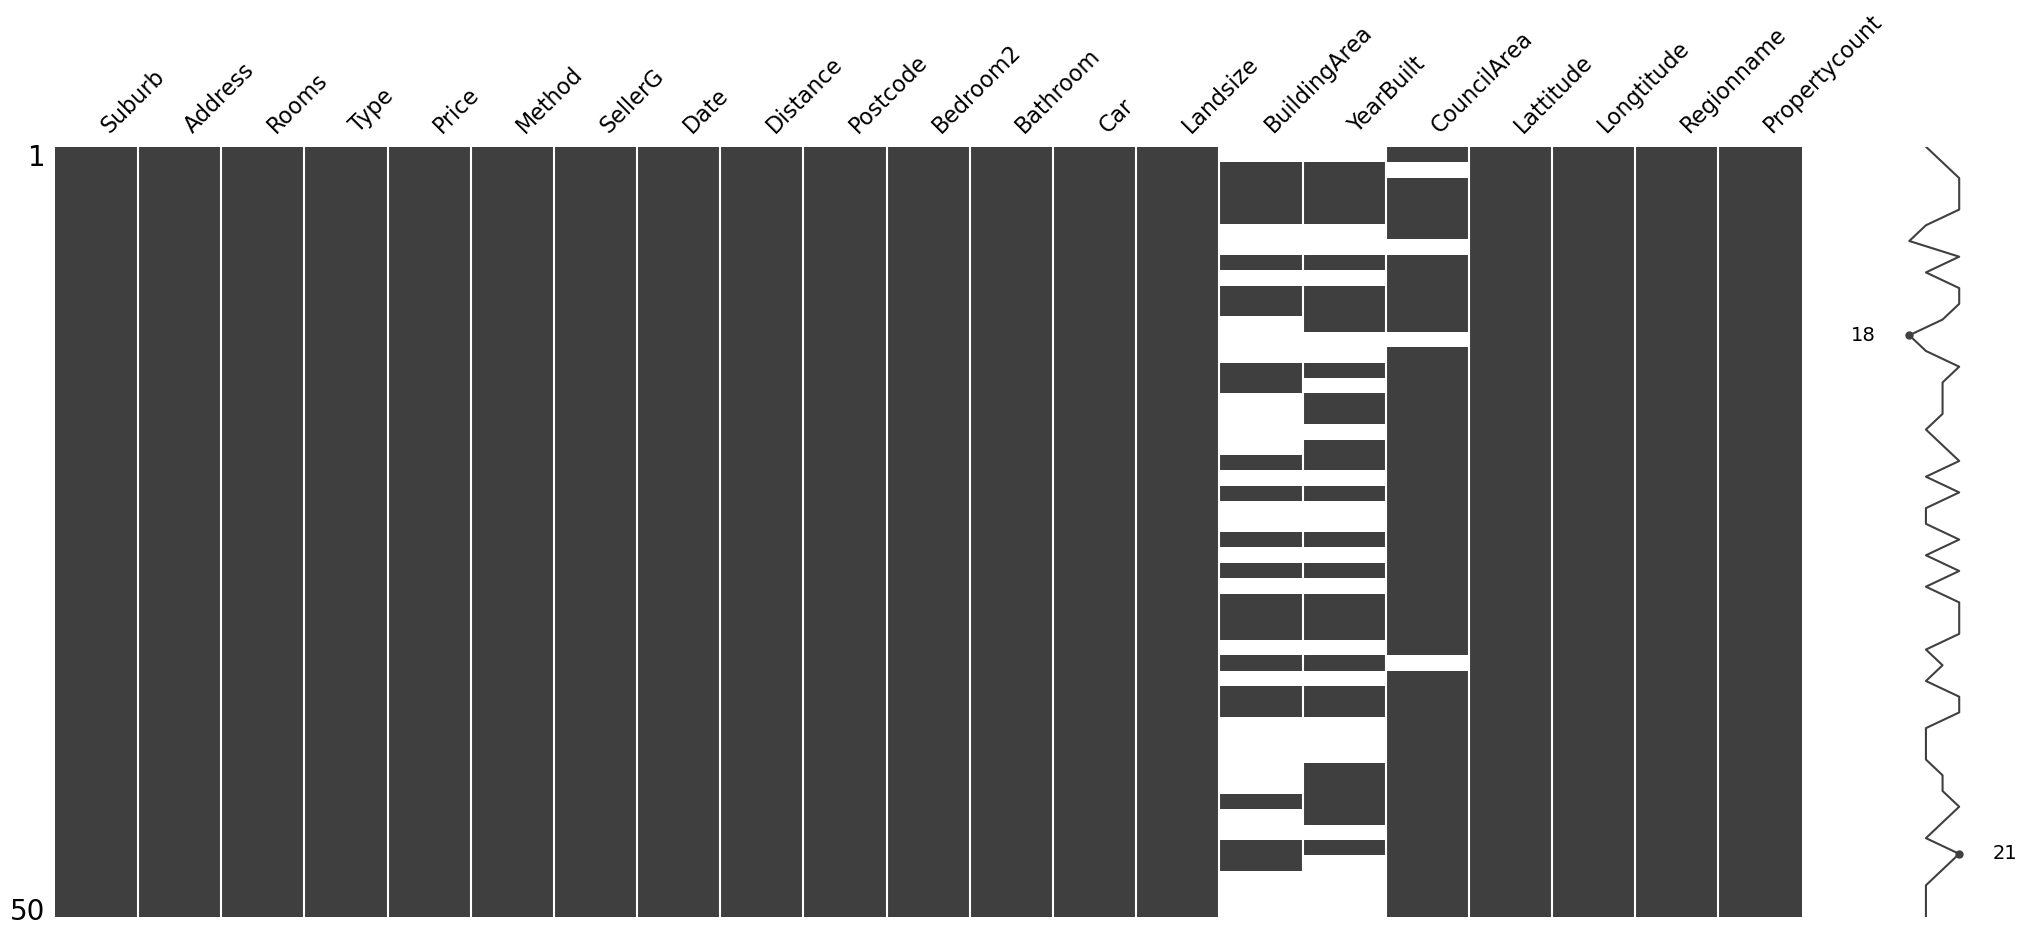

In [75]:
msno.matrix(data.sample(50))

The plot above indicates the following:
+ presence of missing values in the columns 'Car', 'BuildArea', 'YearBuilt'and 'CouncilArea' with 'Car' has less missing values compared to the other. 
+ pattern in the missing values for the 'BuildingArea' and 'YearBuild' columns.

<Axes: >

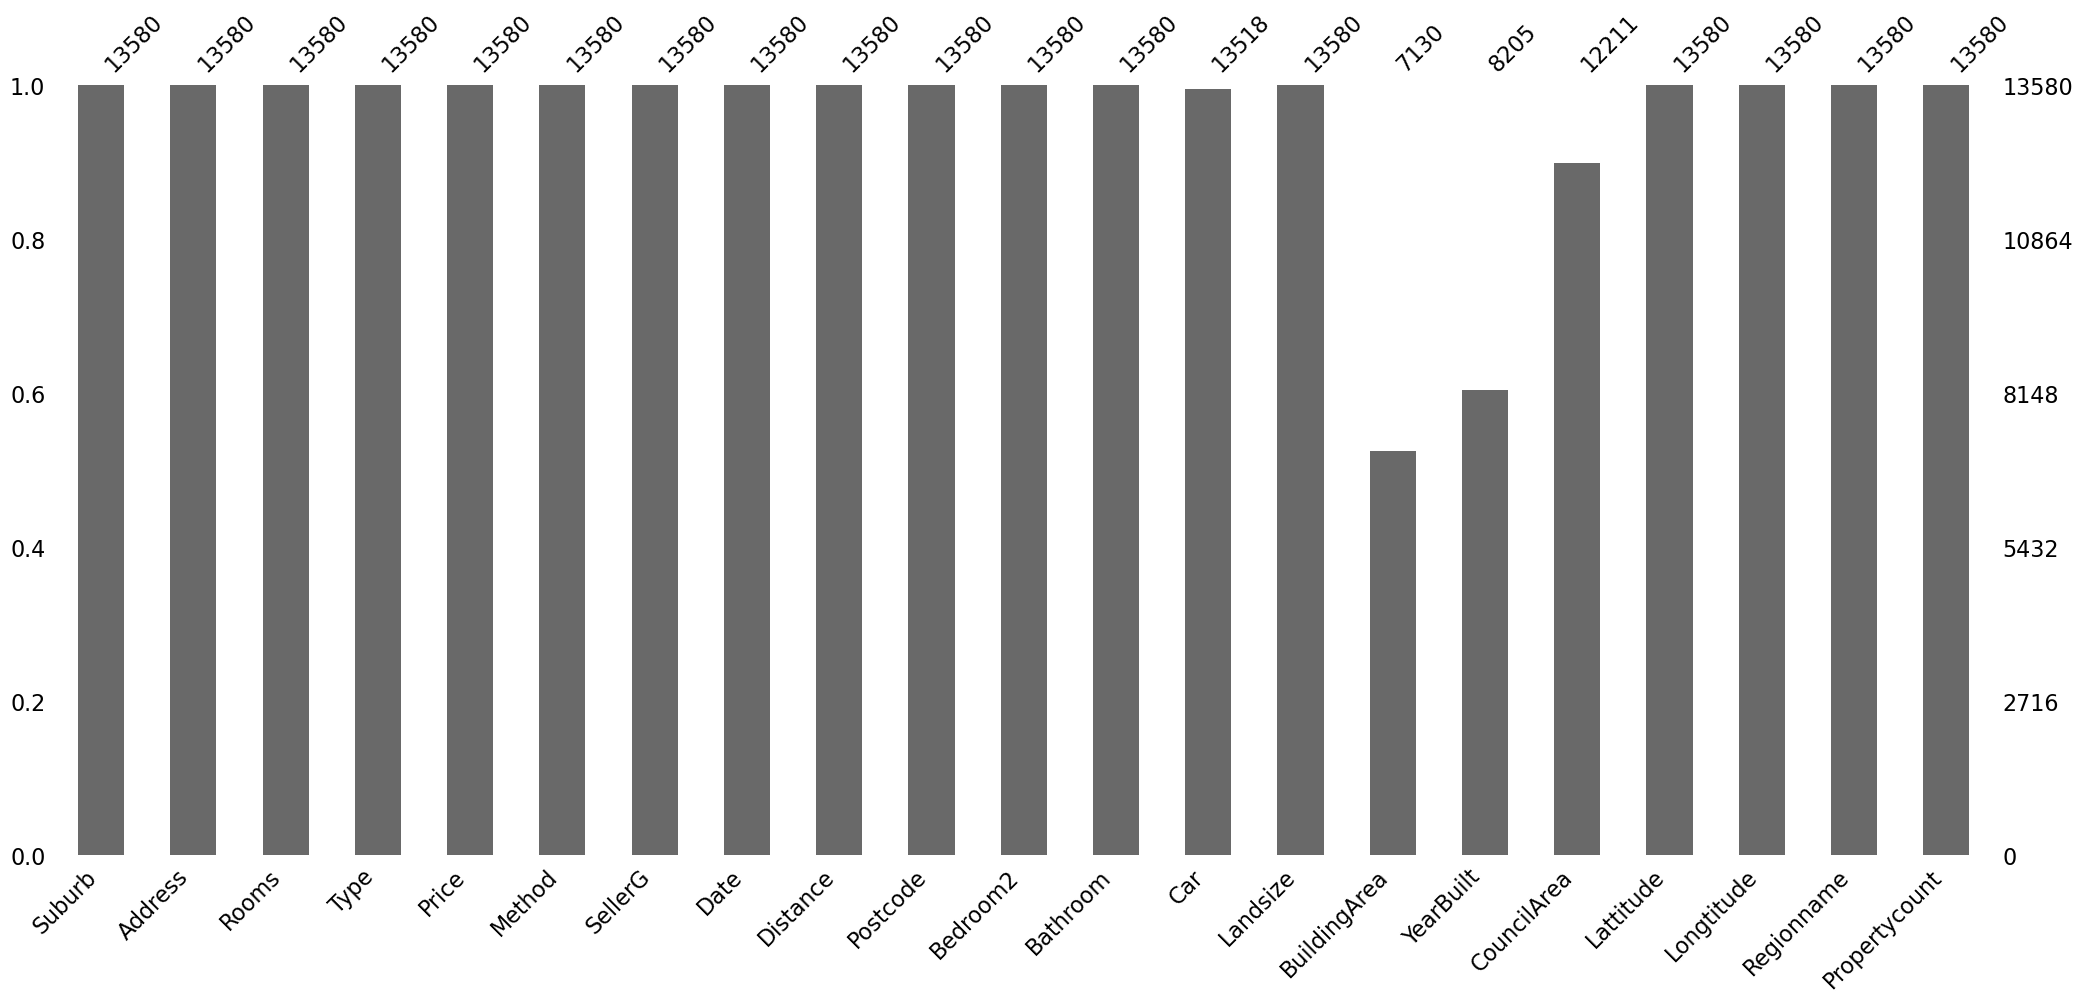

In [76]:
msno.bar(data)

The plot above gives the following informations:
+ The full black vertical strips indicate the absence of missing values.
+ The half bars indicate the presence of missing values.

<Axes: >

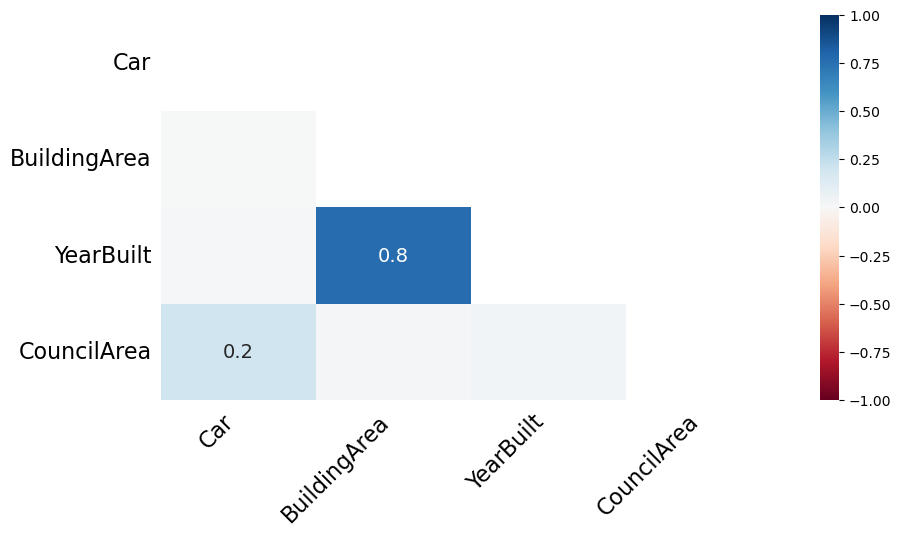

In [77]:
msno.heatmap(data, figsize=(10, 5))

The graph above shows how strong the presence or absence of one feature affects the other.
The graph shows a correlation value of 0.8 between 'BuildingArea' and 'YearBuild' which indicates that the presence of a missing value in one feature would likely result to a missing value in the other feature. This is a confirmation of the pattern indicated above in the matrix plot with the vertical white strips from 'BuildArea' to 'YearBuilt'.

<Axes: >

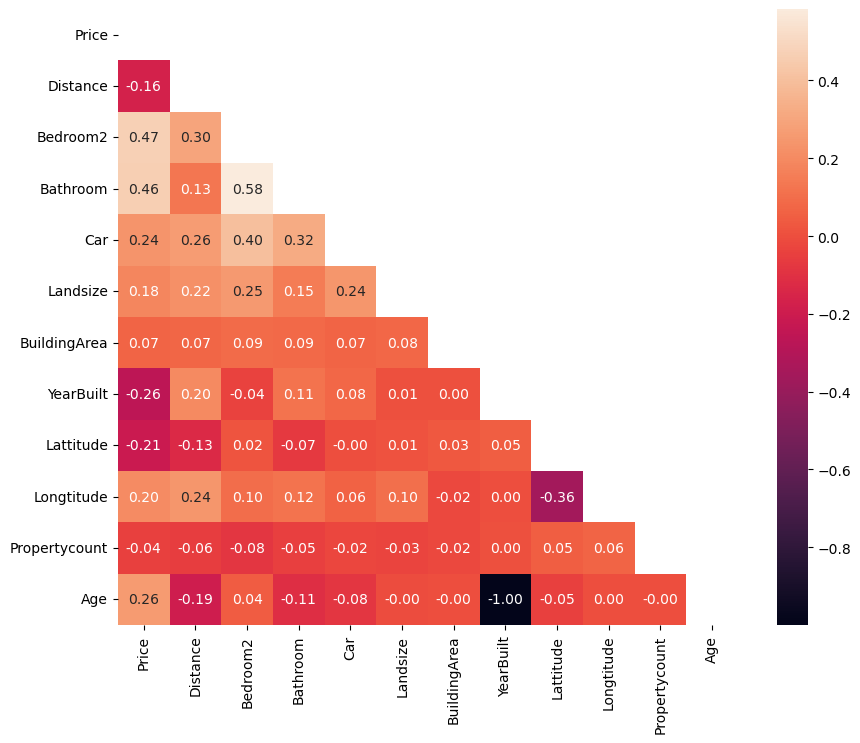

In [129]:
num_data = data.select_dtypes(include=float)
mask = np.triu(np.ones_like(num_data.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(num_data.corr(), annot=True, fmt='.2f', mask=mask)

This correlation heatmap provides a snapshot of the linear relationships between key numerical features in the Melbourne housing dataset. Notably, features like 'Bedroom2' and 'Bathroom' exhibit moderate positive correlations with 'Price', suggesting they are important indicators of property value. Conversely, 'Distance' and 'YearBuilt' show weak negative correlations with 'Price'.  The perfect negative correlation between 'Age' and 'YearBuilt' is expected. Understanding these relationships is crucial for informed feature selection and model building in predicting house prices.

We would create indicator values for the missing values to explicitly inform models about which models were missing, then fill the original missing values with their midian values. As a stragy for dealing with missing values. For detail explanations, please see this article. This approach is prefered in the case of this dataset for two reason.
+ There are serveral missing values, dropping them would reduce almost 50 % of the dataset
+ Since the data types are all numeric, we could consider replacing the missing values with the mean or median directly. However, this might introduce bias in the dataset.

In [357]:
data['BuildingAreaMissing'] = data['BuildingArea'].fillna(0).astype(bool).astype(int)
data['YearBuiltMissing'] = data['YearBuilt'].fillna(0).astype(bool).astype(int)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())

The 'CouncilArea' feature has 1369 missing values. We will create a new category, 'Unknown', for these missing entries to retain the data points and potentially capture information related to the missingness

In [358]:
data['CouncilAreaMissing'] = data['CouncilArea'].fillna(0).astype(bool).astype(int)
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode())

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suburb               13580 non-null  object 
 1   Address              13580 non-null  object 
 2   Rooms                13580 non-null  int64  
 3   Type                 13580 non-null  object 
 4   Price                13580 non-null  float64
 5   Method               13580 non-null  object 
 6   SellerG              13580 non-null  object 
 7   Date                 13580 non-null  object 
 8   Distance             13580 non-null  float64
 9   Postcode             13580 non-null  float64
 10  Bedroom2             13580 non-null  float64
 11  Bathroom             13580 non-null  float64
 12  Car                  13518 non-null  float64
 13  Landsize             13580 non-null  float64
 14  BuildingArea         13580 non-null  float64
 15  YearBuilt            13580 non-null 

The 'Car' feature has 62 missing values. Given that 'Car' represents the number of car spots, a discrete value, we will impute these missing values with the mode. This is based on the assumption that the most frequent number of car spots is the most likely value for the missing entries. We will first examine the distribution of 'Car' to confirm this is a reasonable approach

<Axes: >

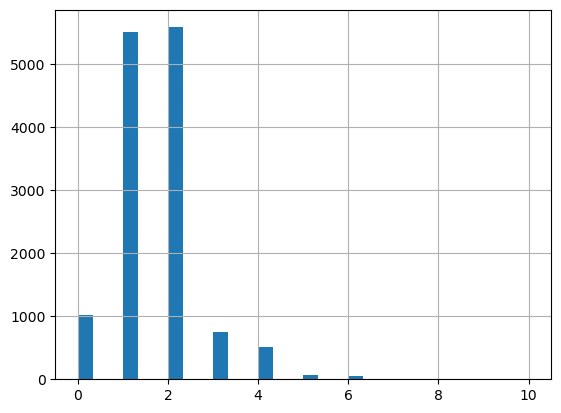

In [360]:
data['Car'].hist(bins=30)

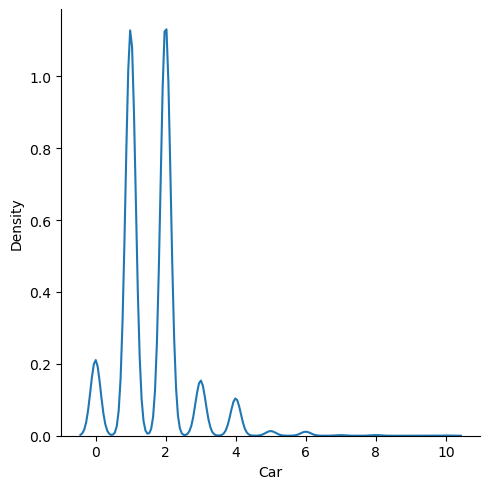

In [361]:
sns.displot(data=data, x='Car', kind='kde')

In [362]:
data['Car'] = data['Car'].fillna(data['Car'].mode())

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suburb               13580 non-null  object 
 1   Address              13580 non-null  object 
 2   Rooms                13580 non-null  int64  
 3   Type                 13580 non-null  object 
 4   Price                13580 non-null  float64
 5   Method               13580 non-null  object 
 6   SellerG              13580 non-null  object 
 7   Date                 13580 non-null  object 
 8   Distance             13580 non-null  float64
 9   Postcode             13580 non-null  float64
 10  Bedroom2             13580 non-null  float64
 11  Bathroom             13580 non-null  float64
 12  Car                  13518 non-null  float64
 13  Landsize             13580 non-null  float64
 14  BuildingArea         13580 non-null  float64
 15  YearBuilt            13580 non-null 

### Identify and handle missing values.

In [364]:
num_data.columns

Index(['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [365]:
outlier_feature_instigation = ['Landsize', 'BuildingArea', 'Price']

In [366]:
def box_hist_plot(dataset,cols):
    for col in cols:
        plt.figure(figsize=(10, 4))
        plt.subplot(3, 2, 1)
        sns.boxplot(x=data[col])
        plt.title(f'Box Plot of {col}')
        
        
        plt.subplot(3, 2, 2)
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()

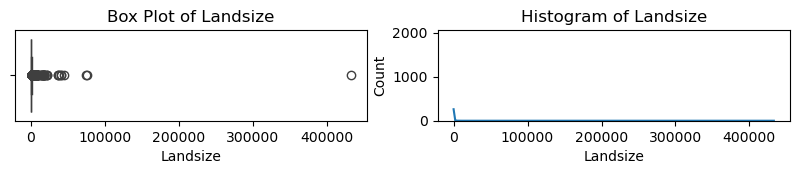

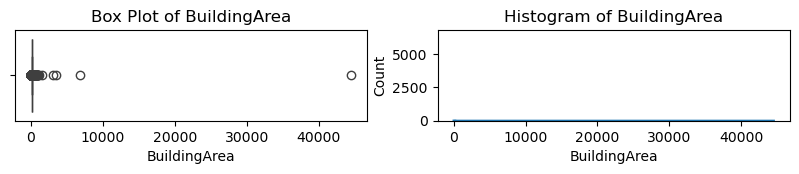

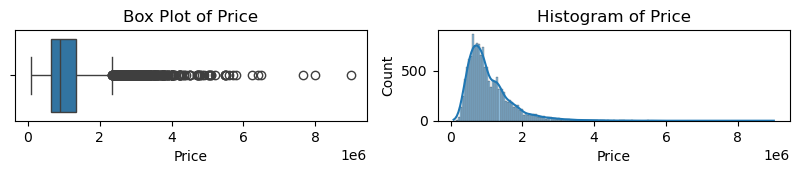

In [90]:
box_hist_plot(data, outlier_feature_instigation )

Points out of the whisker are potential outliers.

In [367]:
def find_outlier_boundaries_iqr(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + multiplier * IQR
    lower_bound = Q1 - multiplier * IQR
    return lower_bound, upper_bound

outlier_boundaries = {}
for feature in outlier_feature_instigation:
    lower, upper = find_outlier_boundaries_iqr(data[feature], multiplier=1.5)
    outlier_boundaries[feature] = {'lower': lower, 'upper': upper}
    print(f"Outlier boundaries for {feature}: Lower = {lower:.2f}, Upper = {upper:.2f}")

Outlier boundaries for Landsize: Lower = -534.00, Upper = 1362.00
Outlier boundaries for BuildingArea: Lower = 110.09, Upper = 141.85
Outlier boundaries for Price: Lower = -370000.00, Upper = 2350000.00


Values falling below the lower bound or above the upper bound are potential outliers based on the IQR method. You can adjust the multiplier (e.g., to 3 for more extreme outliers)

In [368]:
for feature in outlier_feature_instigation:
    lower_bound = outlier_boundaries[feature]['lower']
    upper_bound = outlier_boundaries[feature]['upper']
    outliers_df = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"\nPotential outliers in {feature}:\n{outliers_df.head()}")


Potential outliers in Landsize:
         Suburb              Address  Rooms Type      Price Method   SellerG  \
22   Abbotsford  138/56 Nicholson St      3    u  1090000.0      S    Jellis   
234    Armadale        526 Orrong Rd      4    h  3000000.0     VB    Jellis   
236    Armadale       9/19 Mercer Rd      3    u   735000.0     PI  Marshall   
251    Armadale     367 Dandenong Rd      6    h  5525000.0      S  Marshall   
266    Armadale    10/51 Armadale St      2    u   710000.0      S    Jellis   

           Date  Distance  Postcode  ...  BuildingArea  YearBuilt  \
22   18/03/2017       2.5    3067.0  ...          27.0     1970.0   
234   4/06/2016       6.3    3143.0  ...         126.0     1934.0   
236   7/05/2016       6.3    3143.0  ...          14.0     1970.0   
251  17/09/2016       6.3    3143.0  ...         516.0     1935.0   
266  25/02/2017       6.3    3143.0  ...          80.0     1970.0   

     CouncilArea  Lattitude  Longtitude             Regionname Property

In [369]:
upper_bound_landsize_cap = data['Landsize'].quantile(0.99)
data['Landsize'] = np.where(data['Landsize'] > upper_bound_landsize_cap, upper_bound_landsize_cap, data['Landsize'])

lower_bound_price_remove = data['Price'].quantile(0.005) # Remove bottom 0.5%
data = data[data['Price'] > lower_bound_price_remove]


We investigated outliers in 'Landsize', 'BuildingArea', and 'Price' as these are continuous features likely to have extreme values.


### Handling Outliers

We investigated outliers in 'Landsize', 'BuildingArea', and 'Price' as these are continuous features likely to have extreme values.

**Landsize:**
- Box plots and IQR analysis revealed some very large 'Landsize' values.
- Based on domain knowledge, we decided to cap 'Landsize' at the 99th percentile to reduce the impact of potentially erroneous or extremely rare large properties without removing the entire data point.

**BuildingArea:**
- While some high 'BuildingArea' values were observed, they seemed to correspond to expensive properties.
- We decided to keep these outliers as they represent a legitimate segment of the market.

**Price:**
- We observed some very low 'Price' values that seemed unusually low.
- We removed the bottom 0.5% of 'Price' values, assuming these might be distressed sales or data errors that are not representative of the typical market.

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13508 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suburb               13508 non-null  object 
 1   Address              13508 non-null  object 
 2   Rooms                13508 non-null  int64  
 3   Type                 13508 non-null  object 
 4   Price                13508 non-null  float64
 5   Method               13508 non-null  object 
 6   SellerG              13508 non-null  object 
 7   Date                 13508 non-null  object 
 8   Distance             13508 non-null  float64
 9   Postcode             13508 non-null  float64
 10  Bedroom2             13508 non-null  float64
 11  Bathroom             13508 non-null  float64
 12  Car                  13446 non-null  float64
 13  Landsize             13508 non-null  float64
 14  BuildingArea         13508 non-null  float64
 15  YearBuilt            13508 non-null  floa

### Type conversion

In [371]:
data['Postcode'] = data['Postcode'].astype(str)

Postcodes are categorical and if treated as float might imply a numerical relationship that does not exit. Thus we would convert the data type from float to string.

In [372]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

### Feature engineering

In [373]:
data['Age'] = data['Date'].dt.year - data['YearBuilt']

In [374]:
address_unique_values = data['Address'].value_counts()
address_unique_values

Address
14 Arthur St        3
53 William St       3
2 Bruce St          3
36 Aberfeldie St    3
1/1 Clarendon St    3
                   ..
14 Bossington St    1
4 Montrose St       1
16 Alleford St      1
2/1073 Centre Rd    1
6 Agnes St          1
Name: count, Length: 13307, dtype: int64

In [375]:
print('Number of unique values in the address column', len(address_unique_values))

Number of unique values in the address column 13307


There are 13307 unique values in the address column indicating very high cardinality in this feature. We would drop this columns since it carries little information that could help improve the predictive power of the model.

In [377]:
data = data.drop(['Address', 'Date'], axis=1, errors='ignore')

In [378]:
categorical_data_columns = data.select_dtypes(include='object').columns

## 4. Exploratory Data Analysis (EDA)

### i. Univariate Analysis
We'll select a subset of numerical features that are likely to be important for predicting house prices and analyze their distributions using histograms. We would also consider getting the summary statistics specifically for the chosen columns for detail observation and correlation with the distribution graphs.

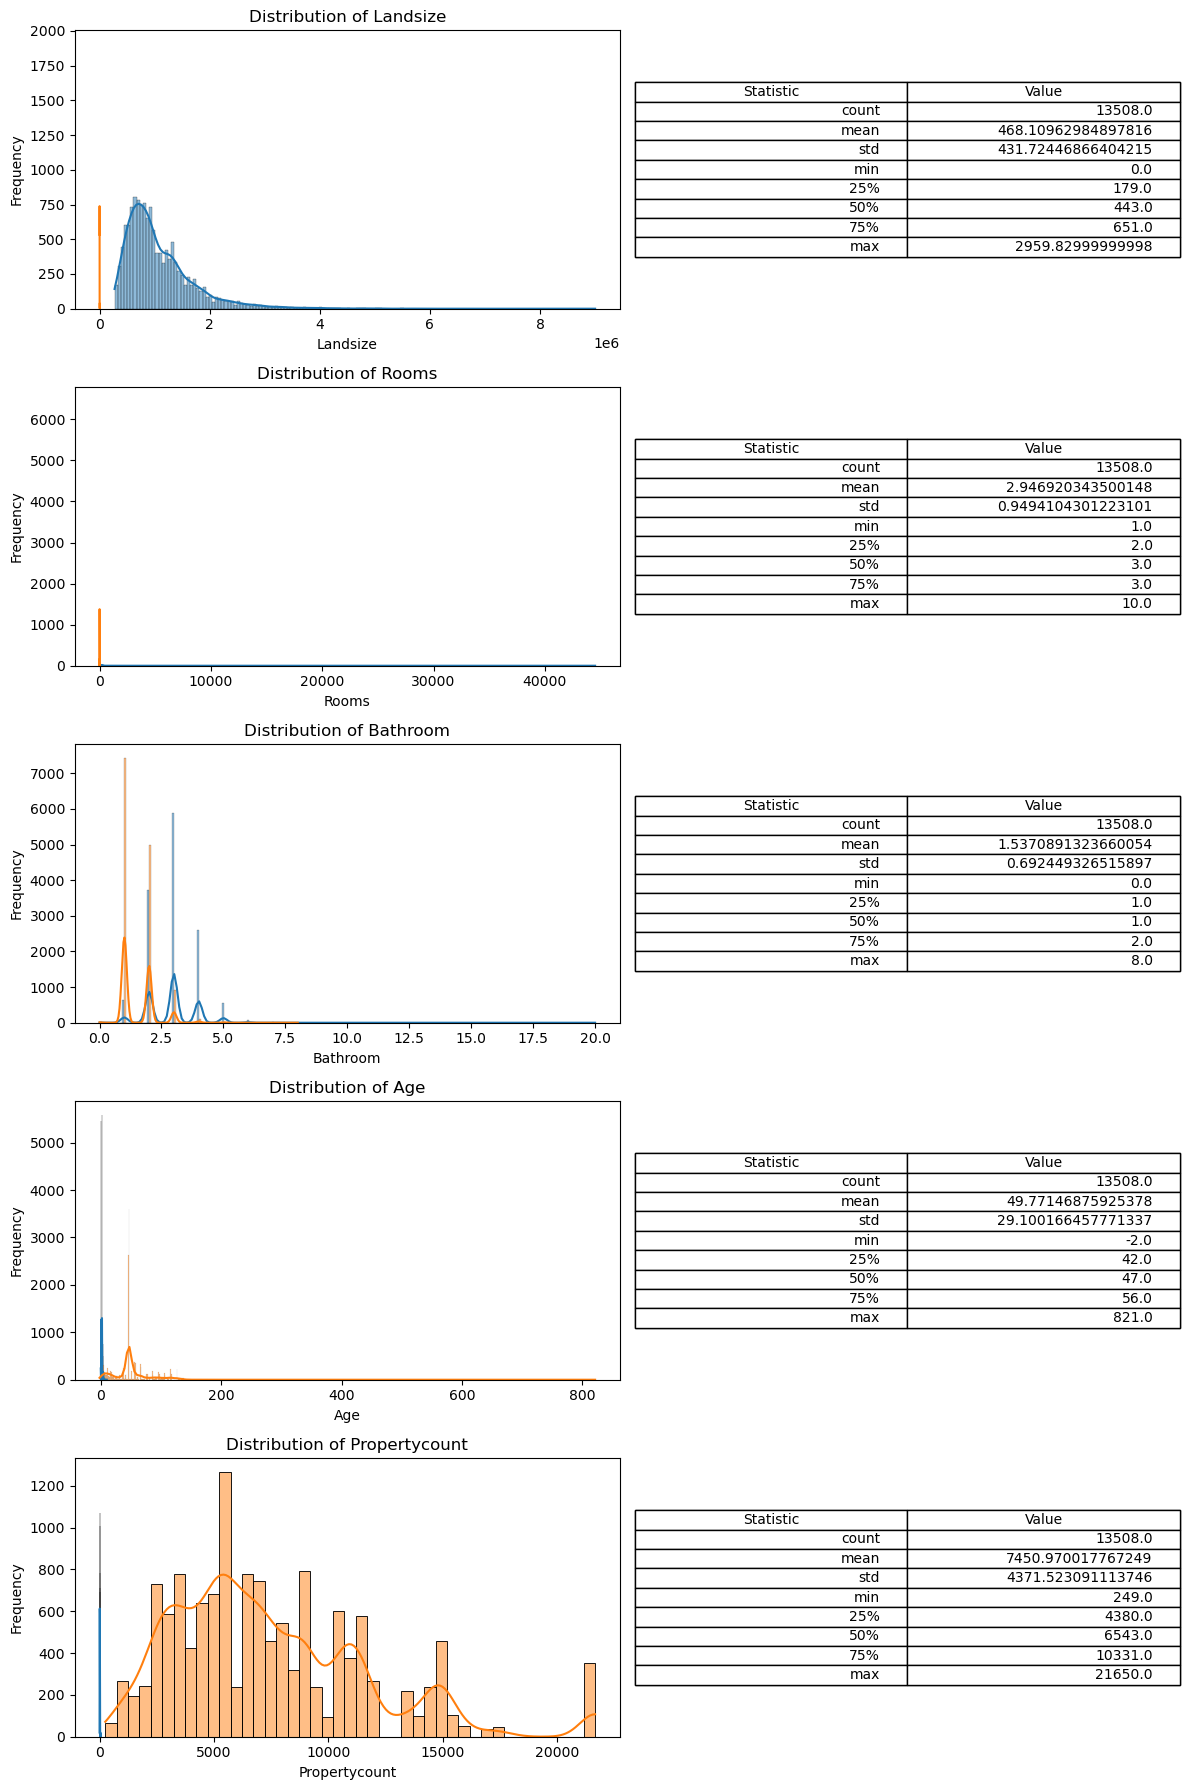

In [264]:
# List of numerical features
numerical_features = ['Price', 'Landsize', 'BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Age', 'Distance', 'Propertycount']

# Create a figure with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

# Loop over the numerical features and plot histograms and summary statistics
for i, feature in enumerate(numerical_features):
    # Plot the histogram in the left column
    ax1 = axes[i // 2, 0]  # Select row based on index and first column
    sns.histplot(data[feature], kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Frequency')
    
    # Display summary statistics in the right column
    ax2 = axes[i // 2, 1]  # Select the corresponding right column
    summary_stats = data[feature].describe().reset_index()
    ax2.axis('off')  # Hide the axis for the table
    ax2.table(cellText=summary_stats.values, colLabels=['Statistic', 'Value'], loc='center')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

+ Histograms: Visualize the distribution of each feature, allowing us to observe the range, central tendency, spread, and shape (skewness, modality).
+ Descriptive Statistics: Provide quantitative measures (mean, median, standard deviation, quartiles) to complement the visual insights from histograms.

### Bivariate Analysis
 We'll analyze the distribution of important categorical features using bar plots.

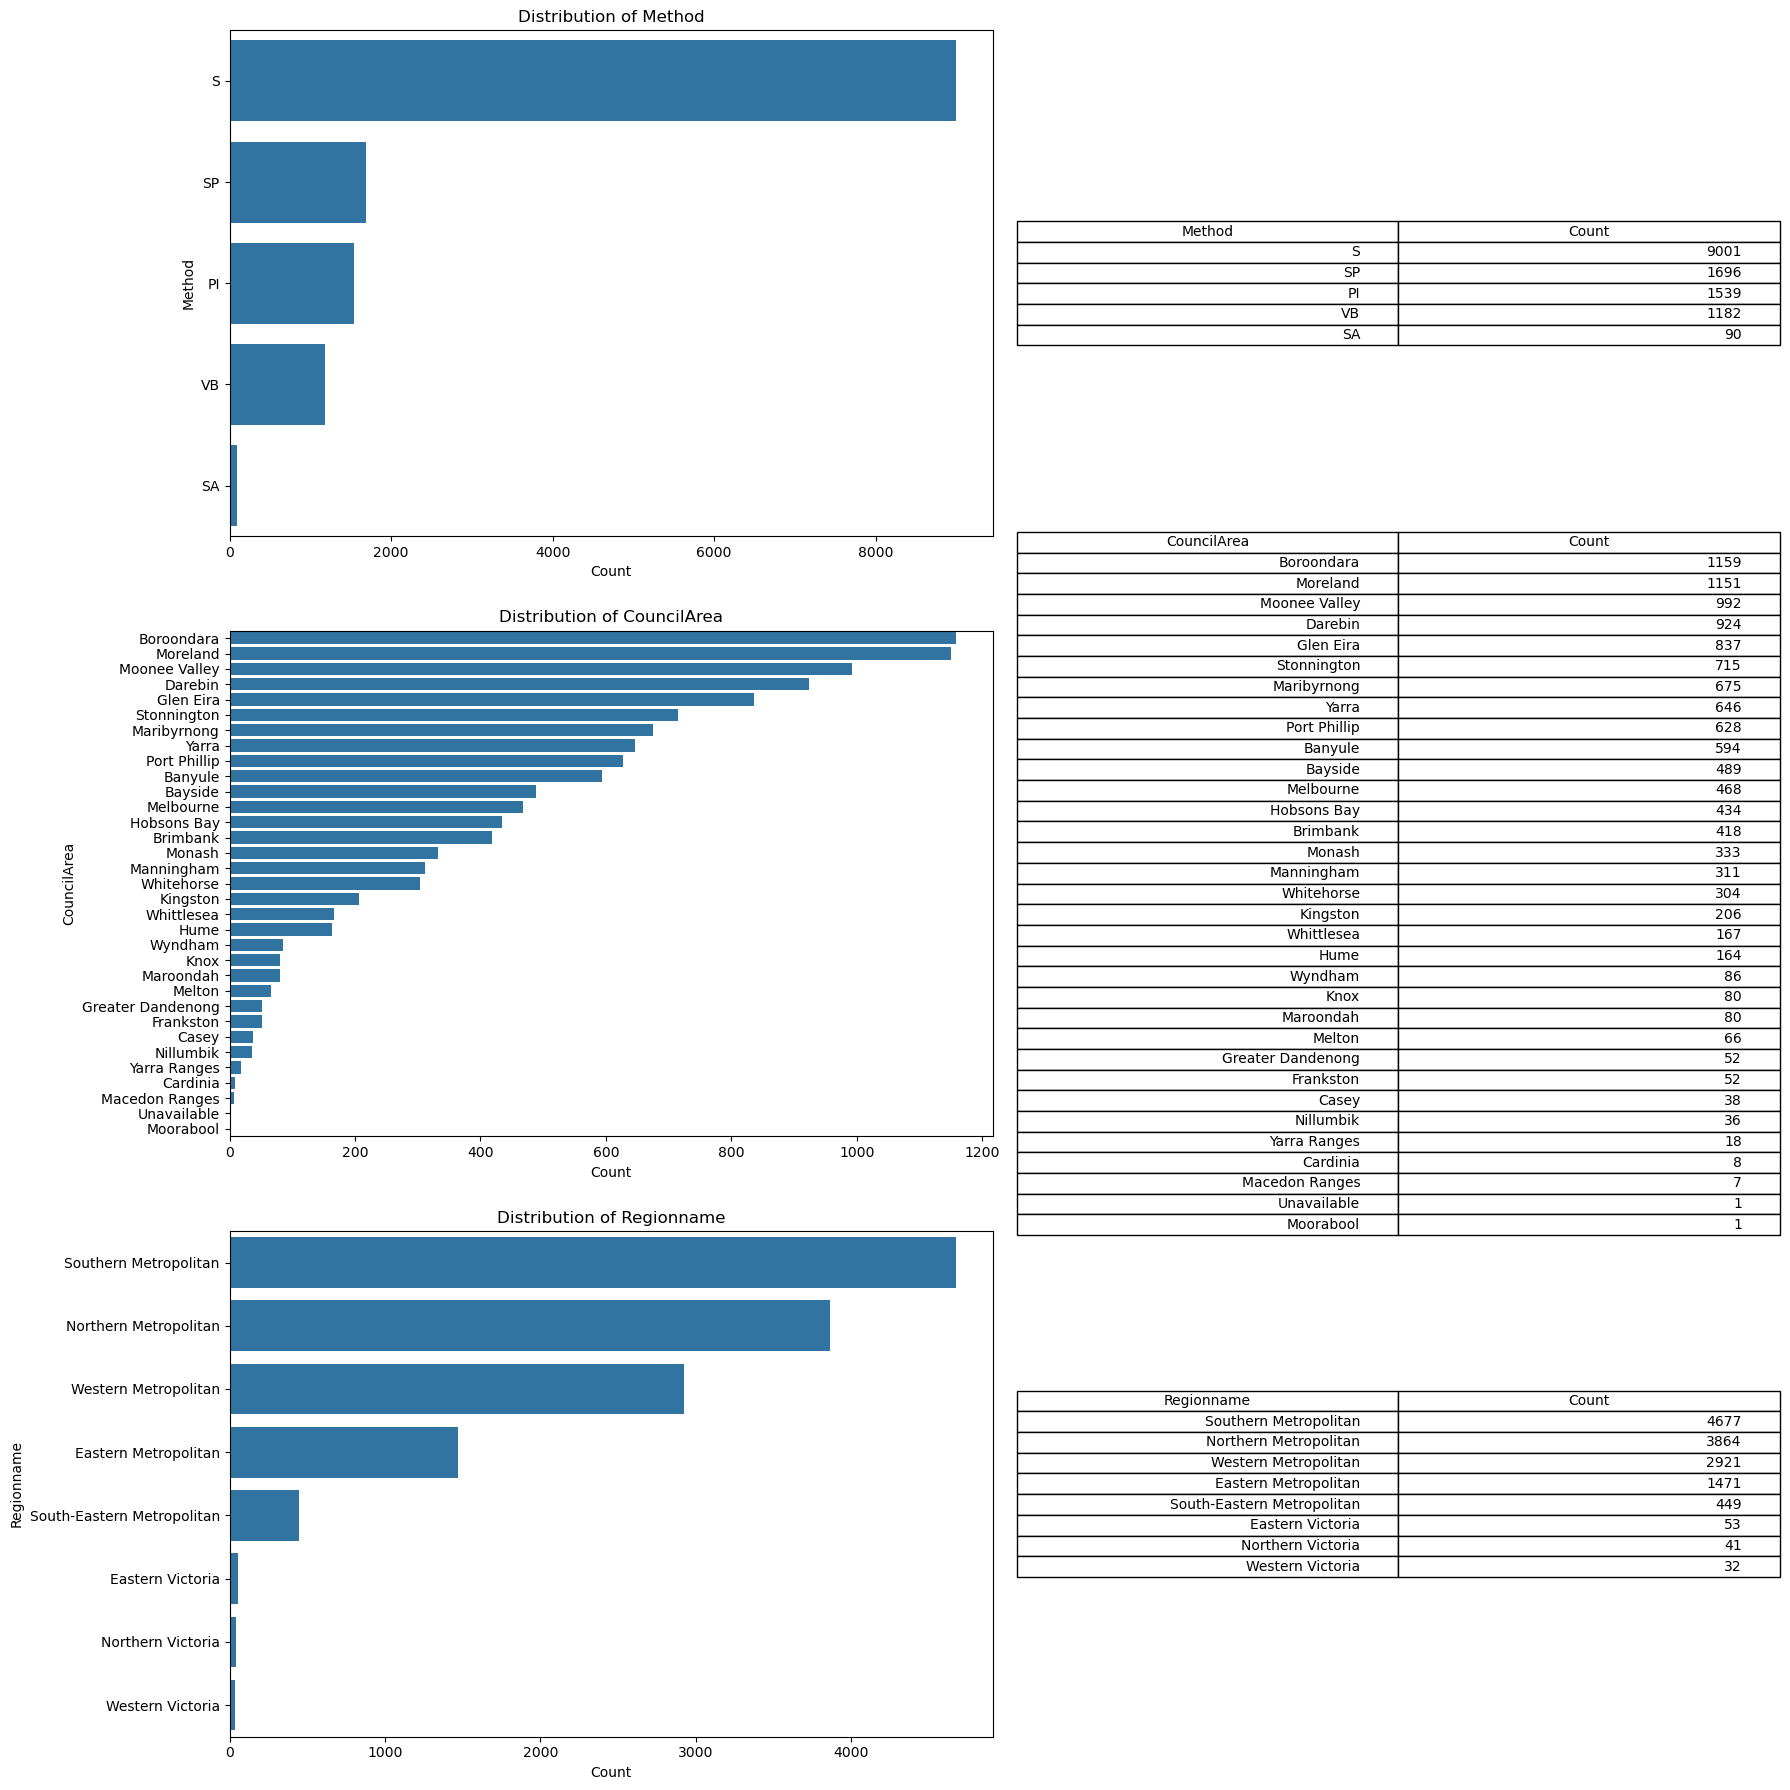

In [112]:
categorical_features = ['Method', 'CouncilArea', 'Regionname']

# Create a figure with 3 rows and 2 columns (one for the plot and one for the value count table)
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Loop over the categorical features to plot them and display value counts side by side
for i, feature in enumerate(categorical_features):
    # Plot the countplot in the first column (left)
    sns.countplot(data=data, y=feature, order=data[feature].value_counts().index, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}')
    axes[i, 0].set_xlabel('Count')
    axes[i, 0].set_ylabel(feature)
    
    # Display the value counts as a table in the second column (right)
    value_counts = data[feature].value_counts().reset_index()
    axes[i, 1].axis('off')  # Hide the axis for the table
    axes[i, 1].table(cellText=value_counts.values, colLabels=[feature, 'Count'], loc='center')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

+ Feature Selection: These categorical features (property type, sale method, location indicators) are crucial for understanding the different segments within the housing market.
+ Bar Plots (Count Plots): Visualize the frequency of each category within the feature, showing the dominance or rarity of certain categories.
+ Value Counts: Provide the exact counts for each category, offering a numerical summary of the distribution.

### i. Bivariate Analysis - Numerical Features vs. Price

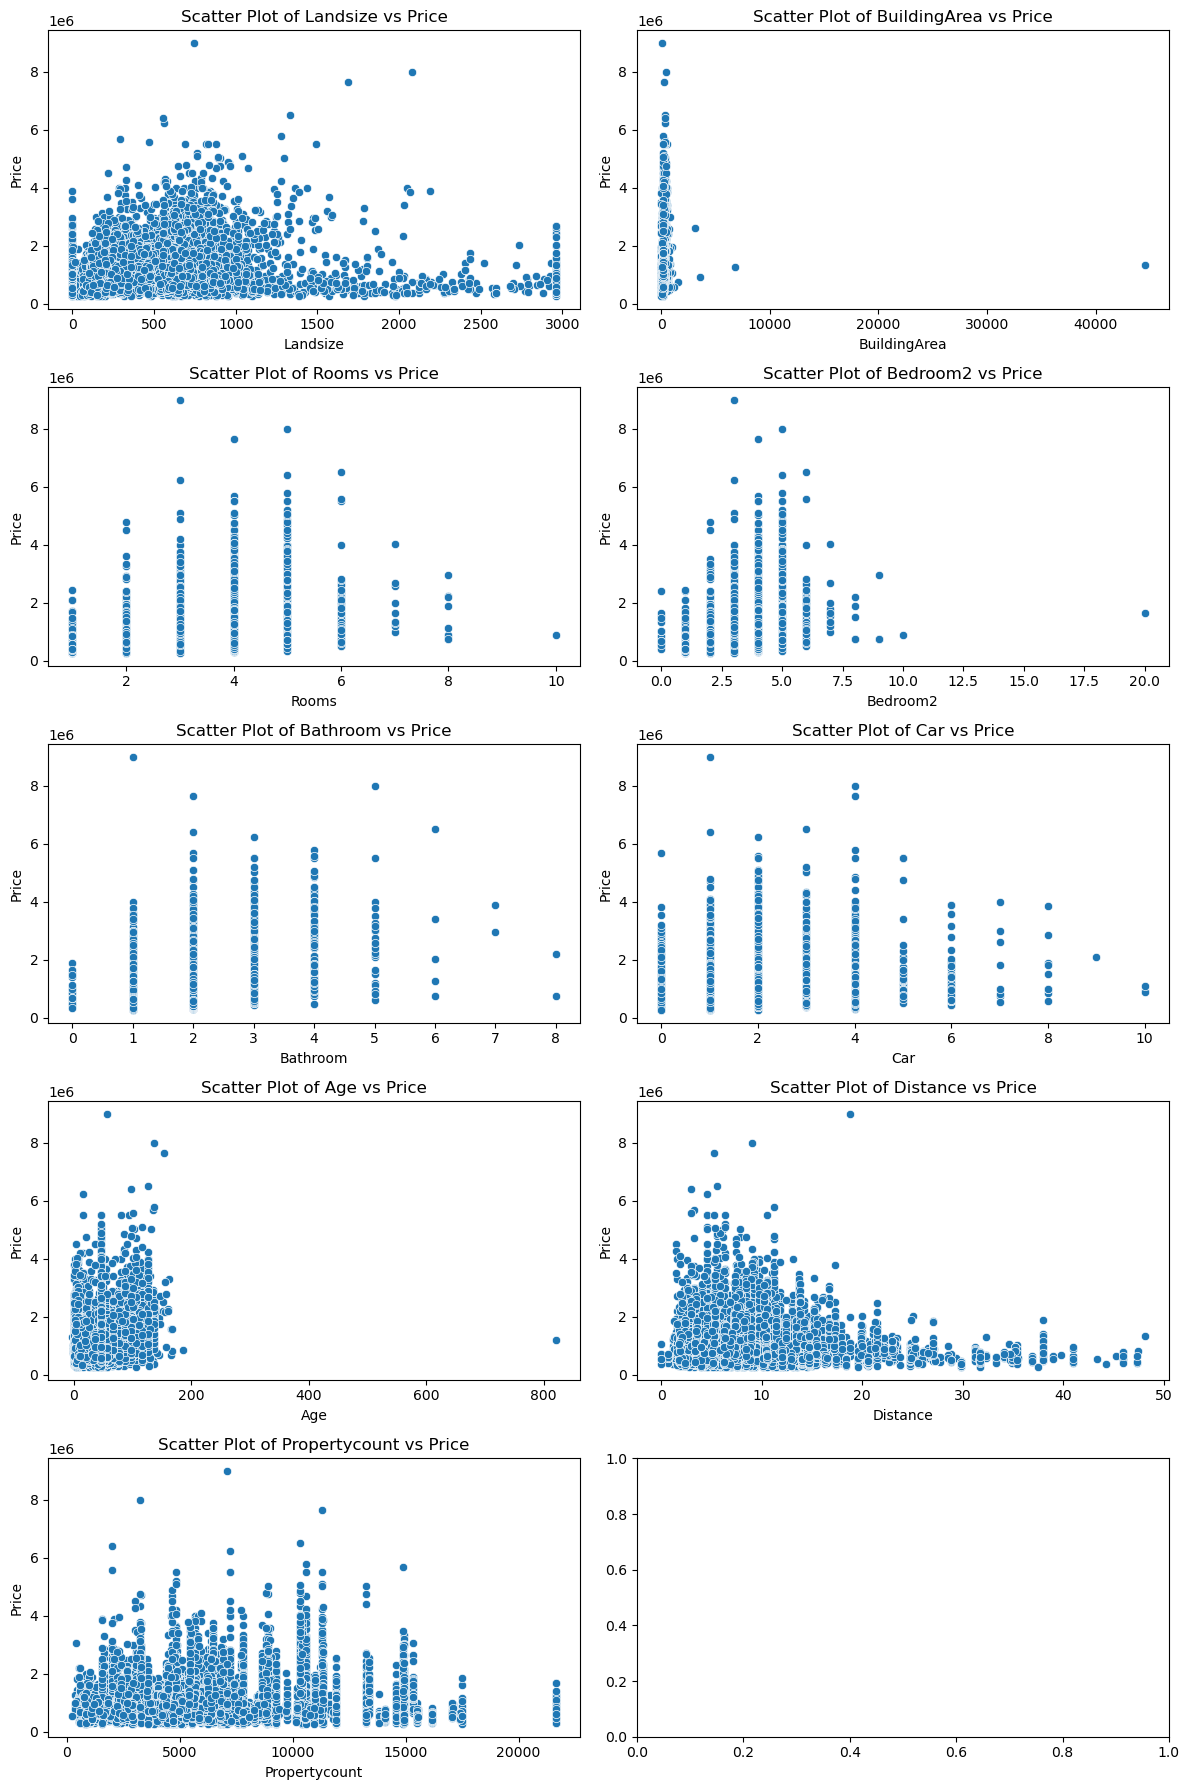

In [116]:
numerical_features = ['Price', 'Landsize', 'BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Age', 'Distance', 'Propertycount']

# Filter out 'Price' from the list (as it is not compared with itself)
numerical_features = [feature for feature in numerical_features if feature != 'Price']

# Create a figure with 5 rows and 2 columns (for side-by-side plots)
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop over the numerical features and plot scatter plots side by side
for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=data[feature], y=data['Price'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

+ Feature Selection: We focus on the relationship with 'Price' because our primary goal is to understand what influences house prices.
+ Scatter Plots: Visualize the relationship between two numerical variables. We look for trends (linear, non-linear), the direction of the relationship (positive or negative), and the strength of the relationship.

### ii. Bivariate Analysis - Categorical Features vs. Price

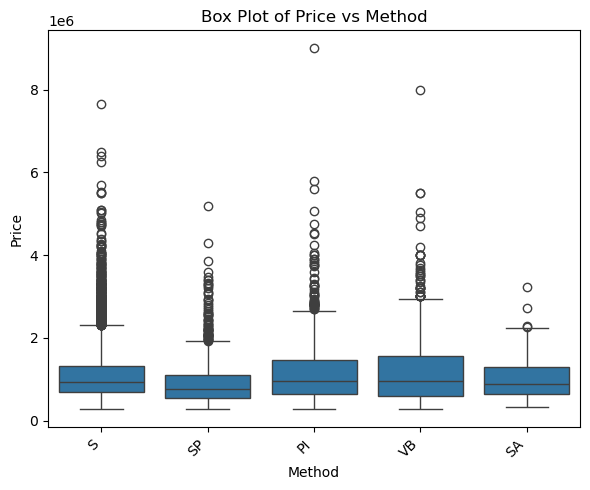

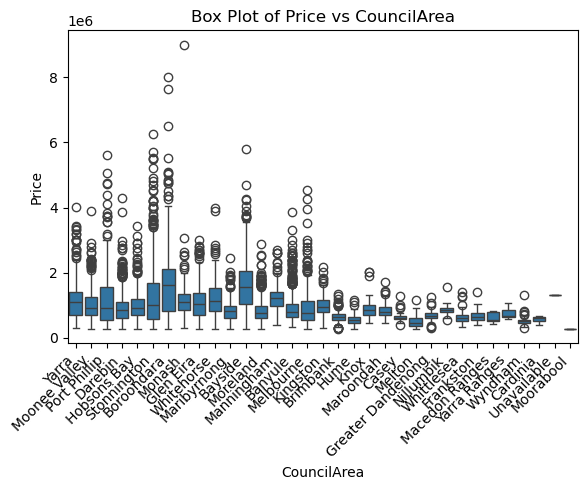

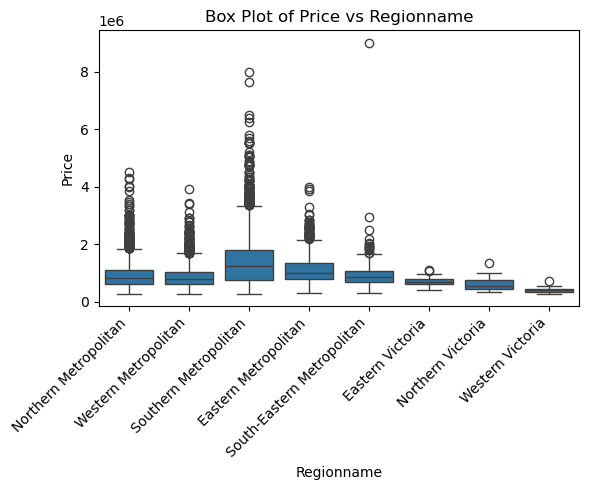

In [122]:
for feature in categorical_features:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=data[feature], y=data['Price'])
    plt.title(f'Box Plot of Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

+ Feature Selection: Understanding how 'Price' varies across different categories of location, property type, etc., is crucial for identifying significant factors influencing price.
+ Box Plots: Visualize the distribution of a numerical variable (Price) for each category of a categorical variable. This helps compare the central tendency (median), spread (IQR), and potential outliers of prices within each category.

### iii. Bivariate Analysis - Correlation Matrix of Numerical Features

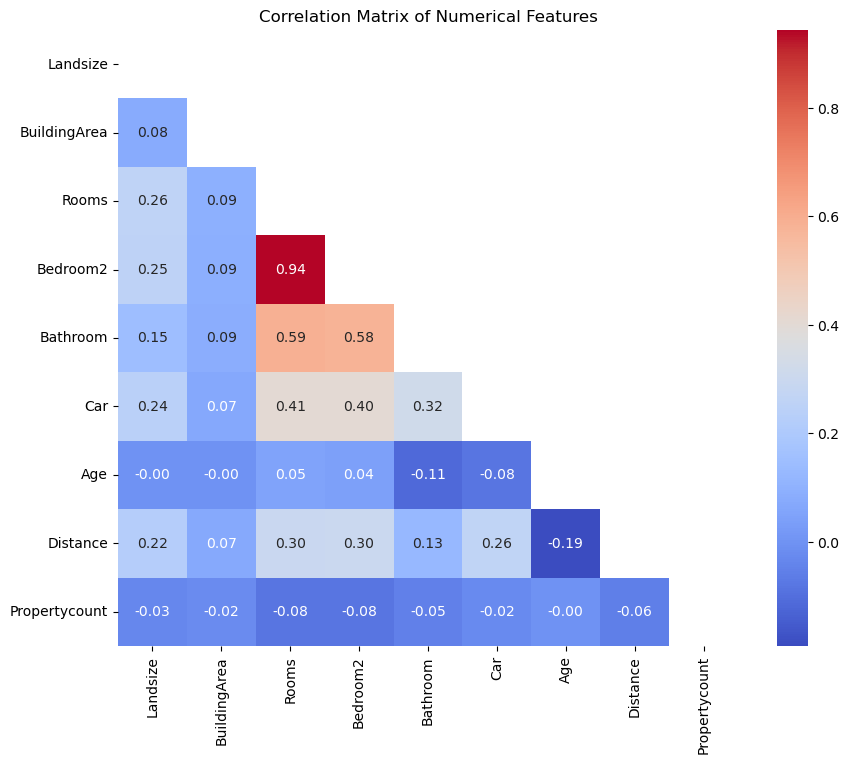

In [126]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


To further explore the relationships between the numerical features in our dataset, we generated a correlation heatmap as displayed above. This visualization allows us to quickly identify features that are linearly related to each other, which is crucial for understanding the underlying structure of the data and potential implications for machine learning modeling.

The heatmap reveals several notable correlations:

+ Strong Positive Correlation between Rooms and Bedroom2 (0.94): As anticipated, there is a very high positive correlation between the number of rooms and the number of bedrooms. This indicates that these two features are highly interdependent, and models might treat them as providing very similar information.
+ Moderate Positive Correlations involving Rooms, Bedroom2, and Bathroom (0.58 - 0.59): We observe moderate positive correlations between the number of rooms and bathrooms, and between the number of bedrooms and bathrooms. This suggests that larger properties with more rooms and bedrooms tend to have more bathrooms.
+ Weaker Positive Correlations with Car (0.32 - 0.41): The number of car parking spaces shows weaker positive correlations with Rooms and Bedroom2, implying a tendency for larger properties to have more parking, but this relationship is not as strong as between the internal space features.
+ Weak Correlations involving Landsize and Distance (around 0.2): Landsize shows weak positive correlations with Rooms and Car, while Distance from the city center also has weak positive correlations with Rooms and Car. These suggest slight tendencies that might be influenced by property type and location outside the inner city.
+ Minimal Correlation with Age and Propertycount: The age of the property and the property count in the area show very weak correlations with most other numerical features, suggesting they might contribute more independent information.
+ Very Weak Correlation between BuildingArea and Landsize (0.08): Interestingly, the building area has a very weak correlation with the land size, indicating that the size of the building doesn't strongly dictate the overall land size, which can vary significantly based on property type and location.

#### Implications for Further Analysis and Modeling:

The high correlation between 'Rooms' and 'Bedroom2' is a key observation. When building linear models, this multicollinearity could make it difficult to isolate the individual impact of these features on the target variable ('Price'). We might need to consider feature selection techniques, such as removing one of these features or creating a combined feature, to address this.

The weaker correlations suggest that many of the numerical features might provide relatively independent information that could be useful for predicting house prices.

This correlation analysis provides valuable insights into the relationships between our numerical features, informing our decisions about feature selection and potential feature engineering as we move towards building machine learning models to predict house prices

In [379]:
for column in categorical_data_columns:
    print(f'{column} has {len(data[column].value_counts())} unique values')

Suburb has 314 unique values
Type has 3 unique values
Method has 5 unique values
SellerG has 268 unique values
Postcode has 198 unique values
CouncilArea has 33 unique values
Regionname has 8 unique values


From the output above, we can see that 'Suburb', 'SellerG' and 'Postcode' have very high cardinality(number of unique values in a dataset column). Thus if we were to encode these values for the case of 'Suburb' for example we would need to create 314 new columns which will drastically increase the dataset requiring huge computer power to process. For simplicity, we would drop the 'Suburb' and 'SellerG' columns.

In [380]:
data = data.drop(axis=1, columns=['Suburb', 'SellerG','YearBuilt'])

We would use one-hot encoding (a technique of converting categorical values into numerical values by creating new columns for each unique value and indicating the presence or absence of a value with 1 or 0 respectively) to encode the remaining categorical features. The decision to use one-hot encoding is because these features have no order (high, low, medium, hot, cold etc) within its values.

In [382]:
categorical_cols_to_encode = ['Method', 'CouncilArea', 'Regionname','Postcode', 'Type']
data = pd.get_dummies(data, columns=categorical_cols_to_encode, drop_first=True, dtype=int)

In [388]:
data.to_csv("prepared_melbourne_house_data.csv", index=False)
print("Prepared data saved to 'prepared_melbourne_housing_data.csv'")

Prepared data saved to 'prepared_melbourne_housing_data.csv'


### Final Summary:

This notebook has successfully completed the crucial stages of data preparation and exploratory data analysis for the Melbourne housing dataset, aligning with the stated objectives.

+ Data Cleaning: Missing values in 'Car' and 'CouncilArea' were addressed, and potential outliers in 'Landsize' were handled, ensuring data quality for subsequent analysis.
+ Feature Engineering: A relevant 'Age' feature was engineered from the 'Date' and 'YearBuilt' columns.
+ Data Transformation: Categorical features were encoded into a numerical format suitable for machine learning algorithms.
+ Exploratory Data Analysis (EDA): Univariate analysis provided insights into the distributions of key features. Bivariate analysis revealed relationships between features, particularly the positive correlations between 'Bedroom2', 'Bathroom', and 'Price', and the weak negative correlation between 'Distance' and 'Price'. A correlation heatmap highlighted potential multicollinearity between 'Rooms' and 'Bedroom2'.
+ The prepared and analyzed dataset is now ready for the next phase: building and evaluating machine learning models to predict house prices. The insights gained from the EDA will inform feature selection and model choices in the subsequent notebook.

### Next Steps:

+ Modeling Notebook: Create a new notebook dedicated to building and evaluating regression models.
+ Load Prepared Data: Load the prepared_melbourne_housing_data.csv file saved at the end of this notebook.
+ Define Target and Features: Separate the target variable ('Price') from the features (X).
+ Train-Test Split: Split the data into training and testing sets to evaluate model performance on unseen data.
+ Feature Scaling (if needed): Apply scaling to the numerical features in both the training and testing sets, depending on the requirements of the chosen models.
+ Model Selection and Training: Experiment with various regression algorithms (e.g., Linear Regression, Ridge, Lasso, Support Vector Regression, Random Forest Regressor, Gradient Boosting Regressor). Train these models on the training data.
+ Model Evaluation: Evaluate the performance of each trained model on the testing data using appropriate metrics for regression (e.g., Mean Squared Error, Root Mean Squared Error, R-squared).
+ Model Tuning: Optimize the hyperparameters of the best-performing model(s) using techniques like GridSearchCV or RandomizedSearchCV.
+ Interpretation and Conclusion: Analyze the model results, identify the most important features influencing price predictions, and draw conclusions based on your findings.

[Next Step](https://github.com/marcndo/ml_foundation/blob/main/EDA/melbourne_data_model_analysis.ipynb)